# RSA-Kryptosystem

***

<div class="alert alert-block alert-danger">
<b>Ziel des Notebooks:</b>

- Grundlegende Konzepte der Kryptographie verstehen
    - formale Definition eines Kryptosystems
    - einfache Substitutionschiffren: Caesar-Chiffre, Vingènere-Chiffre
- Algorithmen zur Berechnung eines minimalen Spannbaums verstehen und anwenden können

<br>
    
<b>Mathematische Tools:<b>
- Zahlentheorie
    - Tonelli-Shanks-Algorithmus
    
</div>

***

## Formale Definition von Kryptosystemen

In der Kryptographie betrachtet man häufig die folgende Situation:

Alice möchte eine geheime Nachricht an Bob schicken. Eve belauscht die beiden, weswegen sich Alice und Bob ein System ausdenken müssen, mit dem Alice ihre Nachrichten sicher verschlüsselt und nur Bob die verschlüsselte Nachricht (Chiffretext) entziffern kann.

Mit solchen <b>Kryptosysteme</b> befasst sich genauer die Kryptographie. Das bedeutet u.a. das Untersuchen verschiedener Kryptosysteme auf Sicherheit, Effizienz und das Entwickeln neue Ansätze um bestehende Systeme zu verbessern oder neue Systeme zu etablieren.



<div class="alert alert-block alert-info">
    
Ein Kryptosystem ist gegeben durch $(N,C,K,e,d)$, wobei 
    
- $N$ die Menge aller möglichen Nachrichten
- $C$ die Menge aller möglichen Chiffretexten
- $K$ die Menge aller möglichen Schlüssel
sind und $e: N \times K \to C$, $d: C \times K \to N$ Abbildungen, genannt <b>Verschlüsselung</b> und <b>Entschlüsselung</b>, mit der Eigenschaft
    $$\forall n\in N \  \forall c\in C \ \forall k \in K : \ d(e(n,k),k)=n$$
    
</div>

Wir betrachten ein Beispiel. 
Eines der einfachsten Kryptosysteme, die <b>Caesar-Chiffre</b>, wird Ihnen sicherlich bekannt vorkommen. Um Operationen auf Buchstaben mathematisch korrekt formulieren zu können, fassen das deutsche Alphabet mit seinen 26 Buchstaben als Gruppe $\mathbb{Z} / 26 \mathbb{Z}$ auf, wobei $A \ \hat{=} \ 0, B \ \hat{=} \ 1, \dots, Z \ \hat{=} \ 25 $. Wir unterscheiden hier vorerst der Einfachheit halber nicht zwischen Klein- und Großschreibung und ignorieren Satzzeichen.

Mit diesen Festlegungen ist die Caesar-Chriffre gegeben durch $N=C = \bigcup_{i\in\mathbb{N}} \{1,\dots,26\}^i$, $K = \{1,\dots,26\}$ und die beiden Abbildungen $$e(n,k) = e((n_1,n_2,\dots,n_l),k) = (n_1+k, n_2+k, \dots, n_l+k) $$ $$ d(c,k) = d((c_1,c_2,\dots,c_l),k) = (c_1-k, c_2-k, \dots, c_l-k)$$
für $n\in N$, $c\in C$, $k\in K$.

Wir betrachten ein Beispiel. Die Nachricht 

> "KRYPTOGRAPHIE IST TOLL"</i> 

soll anhand der Caesar Chiffre mit dem Schlüssel $k=13$ verschlüsselt werden. Wir berechnen zuerst die entsprechende Darstellung der Nachricht in der Gruppe $\mathbb{Z} / 26 \mathbb{Z}$ und erhalten:

> $n = ( 10,17,24,15,19,14,6,17,0,15,7,8,4,8,18,19,19,14,11,11 )$

Nach der Verschlüsselung sieht der fertige Chiffretext so aus:

> $c = e(n,k) = ( 23,4,11,2,6,1,19,4,13,2,20,21,17,21,5,6,6,1,24,24) $



Sie können sich sicherlich denken, dass dieses Kryptosystem nicht besonders sicher ist. Es lässt sich sogar per Hand mit einem Brute-Force-Ansatz lösen, Eve hat also ein leichtes Spiel.

Ein ähnliches Kryptosystem, das bereits im 16. Jahrhundert verwendet wurde und schwieriger zu knacken ist, ist die <b>Vingenère-Chiffre</b>. Diese ist für Nachrichten der Länge $l\in\mathbb{N}$ und ein $m\in\mathbb{N}$ mit $m | l$ gegeben durch

- $N=C = \{1,\dots,26\}^l$
- $K= \{1,\dots,26\}^m$
- $e: N \times K \to C, ((n_1,n_2,\dots,n_l),(k_1, k_2,\dots,k_m)) \mapsto (c_1,\dots, c_l)$ mit $c_i=n_i+k_{i \text{ mod } m}$

Dabei heißt $k\in K$ auch Schlüsselwort und $(n_{i\cdot m +1},\dots,n_{i\cdot m + m})$ für $0\leq i \lt \frac{m}{l}$ nennen wir <b>Block</b>.

<div class="alert alert-block alert-success">
    
### Aufgabe
***
1. Erklären Sie anschaulich, was bei der Verschlüsselung der Vingenère-Chiffre passiert.     
2. Verschlüsseln Sie die Nachricht $n= \text{"KRYPTOSYSTEM"}$ mit der Vingenère-Chiffre und dem Schlüsselwort $k= \text{"ZAHL"}$.
</div>



<div class="alert alert-block alert-info">
Ein Kryptosystem heißt...
    
- <b>monoalphabetisch</b>, wenn bei seiner Verschlüsselung jeder Buchstabe des Klartextes durch genau einen anderen Buchstaben des Alphabets ersetzt wird. Die Substitution ist während der gesamten Nachricht konstant. 
- <b>polyalphabetisch</b>, wenn jeder Buchstabe des Klartextes durch einen Buchstaben ersetzt wird, der von der Position im Text abhängt, d.h. derselbe Klartextbuchstabe an verschiedenen Stellen der Nachricht durch unterschiedliche Buchstaben ersetzt werden kann.
</div>

<div class="alert alert-block alert-warning">
<b>Denkanstoß:</b> Sind die obigen Kryptosysteme mono- oder polyalphabetisch?
</div>

Auch für das Brechen der Vingenère-Chiffre gibt es inzwischen verschiedene vielversprechende Methoden. Daher gilt auch dieses Kryptosystem als unsicher, außer man wählt $m=l$ und lässt den Schlüssel zufällig generieren. Diese spezielle Form der Vingenère-Chiffre gilt als theoretisch perfekt sicher und nennt man auch <b>Vernam-Chiffre</b>.

Aber wie erfährt Bob den geheimen Schlüssel? Beim Vingenère-Kryptosystem erstellt Alice diesen und schickt die verschlüsselte Nachricht ab Bob. Bevor Bob aber den empfangenen Chiffretext entschlüsseln kann, muss er den geheimen Schlüssel mitgeteilt bekommen. <br>
Die Frage des <b>Schlüsselaustauschs</b> stellt in der Kryptographie ein weiteres wichtiges Problem dar.

Es gibt Kryptosysteme, welche dieses Problem mit berücksichtigen und bereits eine Lösung eingebaut haben, z.B. <b>Public-Key-Kryptosysteme</b>.



<div class="alert alert-block alert-info">
Ein <b>Public-Key-Verschlüsselungsverfahren</b> ist ein Kryptosystem, welches zwei verschiedene Arten von Schlüsseln besitzt:
    
- einen <b>öffentlichen Schlüssel</b>, mit dem sich Klartexte verschlüsseln lassen
- einen <b>privaten Schlüssel</b>, mit dem sich Chiffretexte entschlüsseln lassen
    
Der private Schlüssel wird von einer Person erzeugt, anschließend geheim gehalten und nicht mitgeteilt. Der öffentliche Schlüssel ist für alle Personen zugänglich.
</div>

Das RSA Verfahren zählt zu diesen <b>Public-Key-Kryptosystemen</b>.


Um die Funktionsweise des RSA-Verfahren zu verstehen, brauchen wir noch ein paar mathematische Grundlagen aus der Zahlentheorie.

***

## Zahlentheoretische Grundlagen

Wir beginnen mit der Definition von einer der wichtigsten Funktionen der algebraischen Zahlentheorie, die von Leonard Euler in den 1760er Jahren eingeführt wurde.

<div class="alert alert-block alert-info">
    
Die <b>Eulersche Phi-Funktion</b> ist definiert als
$$\varphi: \mathbb{N} \to \mathbb{N}, n \mapsto |\{ a\in \mathbb{N} \mid 1 \leq a \leq n \land \gcd(a,n)=1 \}|$$
und besitzt folgende Eigenschaften:
    
- $\varphi$ ist multiplikativ, d.h. für alle teilerfremden $m,n\in \mathbb{N}$ gilt $\varphi(mn) = \varphi(m) \cdot \varphi(n)$
- $\forall p\in \mathbb{P}: \varphi(p) = p-1$, wobei $\mathbb{P}$ die Menge der Primzahlen bezeichnet
- $\forall n\in \mathbb{N}: \ n = \sum_{d | n} \varphi(d) $


</div>





<div class="alert alert-block alert-success">
    
### Aufgabe
***
Beweisen Sie die drei Eigenschaften in der obigen Definition.
</div>

Ein weiteres zentrales Resultat der Zahlentheorie ist der Kleine Fermatsche Satz. Der französische Mathematiker Pierre de Fermat formulierte diesen bereits 1640, doch erst fast 100 Jahre später wurde er vollständig bewiesen, ebenfalls durch Leonard Euler.



<div class="alert alert-block alert-info">

<b>Kleiner Fermatscher Satz</b>
    
Sei $n \in \mathbb{N}$ und $a\in \{1,\dots,n\}$ mit $\gcd(n,a)=1$. Dann gilt $$a^{\varphi(n)} \equiv 1 \mod n $$

</div>


Fermat entdeckte übrigens im Laufe seines Lebens eine ganze Reihe von bekannten Sätzen, die Beweise überließ er jedoch seinen Kollegen. vollständig selbst bewiesen hat Fermat nur ein einziges Theorem: Dieses besagt, dass keine zwei rechtwinklige Dreiecke mit ganzzahligen Kantenlängen existieren können, sodass die erste Kathete des Dreiecks $T_1$ kongruent zu einer Kathete des Dreiecks $T_2$ und die zweite Kathete von $T_1$ kongruent zur Hypothenuse von $T_2$ ist.


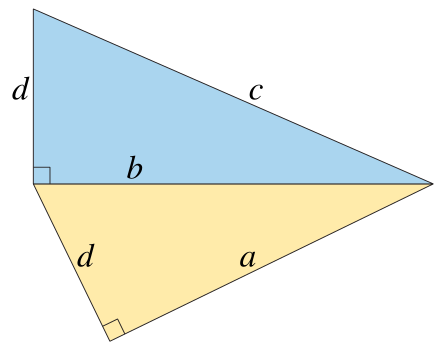 <br>
    <i> Abbildung 1: Fermats Dreiecke </i>   <br>
    <font size="1"> By David Eppstein - Own work, CC0, https://commons.wikimedia.org/w/index.php?curid=57316802</font>


***

## RSA-Kryptosystem

Das RSA-Verschlüsselungssystem funktioniert folgendermaßen.

Wir wählen den Nachrichten- und Chriffreraum $N= C=\mathbb{N}$.

1. Bob wählt zufällig zwei ungleiche Primzahlen $p,q\in\mathbb{P}$ und berechnet $m := p\cdot q$, $\varphi(m)=(p-1)(q-1)$. <br>
Er wählt ein $e\in (\mathbb{Z}/\varphi(m)\mathbb{Z})^*$, also der Einheitengruppe von $\mathbb{Z}/\varphi(m)\mathbb{Z}$ und berechnet sein Inverses $d:= e^{-1} \mod \varphi(m)$. <br>

<b>Privater Schlüssel</b> von Bob: $d$ <br>
<b>Öffentlicher Schlüssel:</b> $(m,e)$

2. Alice verschlüsselt ihre Nachricht $n\in N$ durch potenzieren mit $a$: $$c := e(n,a)= n^e \mod m$$ 
und schickt die verschlüsselte Nachricht $c$ an Bob.

3. Bob erhält $c$ und entschlüsselt die Nachricht mit seinem privaten Schlüssel durch die Abbildung
$$d(c,e)=c^d \mod m$$

<div class="alert alert-block alert-success">
    
### Aufgabe
***
1. Beweisen Sie, dass die Entschlüsselung des RSA-Verfahrens funktioniert.
2. Verschlüsseln Sie die Nachricht $n=9$ mit den Parametern $p= 11$, $q=13$, $a=7$.
3. Implementieren Sie Julia-Funktionen zum Ver- und Entschlüsseln von Nachrichten nach dem RSA-Verfahren.
</div>

***

Natürlich werden in der Realität deutlich größere Werte für $p,q,a$ gewählt als in der Aufgabe. Üblicherweise liegen die Primzahlen im Bereich von mehreren Hundert Dezimalstellen und es gilt $p,q \gg n$. <br>
Vor allem die Verwendung von kleinen Exponenten ist aus sicherheitstechnischen Gründen kritisch. Warum man beim RSA-Verfahren immer große Exponenten wählen sollte, sehen Sie in der nächsten Aufgabe.

<div class="alert alert-block alert-success">
    
### Aufgabe
***
Alice will die gleiche Nachricht an mehrere Personen verschicken. Dafür benutzt sie die RSA-Verschlüsselungen mit unterschiedlichen Werten für $m$, aber verwendet immer $e=3$.

Zeigen Sie, dass sich mit diesen Informationen die Nachricht für Angreifer leicht entschlüsseln lässt. Veranschaulichen Sie Ihre Beweisidee an einem konkreten Zahlenbeispiel.

<i>Hinweis:</i> Verwenden Sie den Chinesischen Restsatz.
</div>

***

Wir sehen also, dass nicht alle Wahlen von Primzahlen für eine sichere Verschlüsselung geeignet sind.

Aber auch im Fall, wenn alle Parameter geeignet gewählt sind, müssen Alice und Bob aufpassen:
Denn sollte auch <u>nur einer</u> der geheimen Parameter $\varphi(m), p, q, d$ zu Eve durchsickern, so ist die Chiffre direkt gebrochen. Es sollte also darauf geachtet werden, dass wirklich alle Parameter mit Ausnahme vom öffentlichen Schlüssel geheim gehalten werden.

<div class="alert alert-block alert-success">
    
### Aufgabe
***
Zeigen Sie, dass Eve alle Parameter des RSA-Kryptosystems effizient berechnen kann, sobald sie einen weiteren der Parameter $\varphi(m),p,q$ kennt.
</div>

***

Eine weitere Sicherheitslücke stellt das folgende Szenario dar: <br>
Eve kennt natürlich den öffentlichen Schlüssel $(m,e)$ und hat somit alle nötigen Informationen, um beliebige Nachrichten zu verschlüsseln. Sie kann also leicht eine Mitteilung an Bob schicken, in der sie sich als Alice ausgibt.

Für dieses Problem wurde das Konzept von <b>digitalen Signaturen</b> entwickelt. 
Digitale Signaturen verwendet man um die Authentizität und Integrität einer Nachricht zu prüfen. Eine Nachricht ist authentisch, wenn sie wirklich vom angegebenen Absender stammt und integrär, wenn sie nicht nachträglich noch verfälscht oder abgeändert wurde. <br>

im RSA-Verschlüsselungsverfahren lassen sich digitale Signaturen folgendermaßen umsetzen.

1. Alice wählt erneut zwei verschiedene Primzahlen $p_A,q_A \in \mathbb{P}$ und berechnet $m_A=p_A\cdot q_A$ und $\varphi(m_A)=(p_A-1)(q_A-1)$. Sie wählt einen privaten Schlüssel $e_A$ mit Inversem $d_A:=e_A^{-1} \mod \varphi(m)$ und unterzeichnet die Nachricht $n$ durch potenzieren mit dem privaten Schlüssel $e_A$:
$$n_A := n^{e_A} \mod m_A$$
Die unterzeichnete Nachricht $n_A$ kann sie nun mit dem öffentichen Schlüssel $(e,m)$ von oben wie gehabt verschlüsseln und schickt $$c:=n_A^e$$ zusammen mit $(m_A,d_A)$ an Bob.

<b>Privater Signaturschlüssel</b> von Alice: $e_A$ <br>
<b>Öffentlicher Signaturschlüssel</b>: $(m_A,d_A)$

2. Bob erhält die verschlüsselte Nachricht und entschlüsselt sie mit seinem privaten Schlüssel: $c^d = n_A \mod m$. Ob die Nachricht wirklich von Alice stammt, kann er testen, indem er den öffentlichen Signaturschlüssel anwendet: $$n_A^{d_A}=n \mod m_A$$
Die entschlüsselte Nachricht ergibt nur Sinn, wenn sie wirklich mit Alices privatem Signaturschlüssel erzeugt wurde.

Damit hat Eve deutlich größere Schwierigkeiten, Nachrichten zu fälschen. Eine Möglichkeit wäre es, den privaten Signaturschlüssel zu erraten, was bei Primzahlen von ausreichender Größe sehr schwierig ist.

<div class="alert alert-block alert-success">
    
### Recherche-Aufgabe
***
Sammeln Sie Informationen zum geschichtlichen Hintergrund des RSA-Kryptosystems. Wie hat es sich im Laufe der Zeit entwickelt? Welches waren/sind die Anwendungsbereiche des Kryptosystems?
</div>

***

## Rabin-Kryptosysten

Ein Spezialfall des RSA-Kryptosystems ist das Rabin-Kryptosystem. Dieses funktioniert im Prinzip wie das RSA-Verschlüsselungssystem, mit der Ausnahme, dass der feste Paramater $e=2$ gewählt wird.

1. Bob wählt zufällig zwei ungleiche Primzahlen $p,q\in\mathbb{P}$. 

<b>Privater Schlüssel</b> von Bob: $(p,q)$ <br>
<b>Öffentlicher Schlüssel:</b> $m$

2. Alice verschlüsselt ihre Nachricht $n\in N$ durch potenzieren mit $e$: $$c := e(n)= n^2 \mod m$$ 
und schickt die verschlüsselte Nachricht $c$ an Bob.

3. Bob erhält $c$ und entschlüsselt die Nachricht mit seinem privaten Schlüssel durch die Abbildung
$$d(c)=\sqrt{c} \mod m$$

Die Schwierigkeit besteht auch hier wieder dahin, eine Wurzel in der Gruppe $\mathbb{Z} / m \mathbb{Z}$ zu ziehen. Dafür gibt es aber inzwischen effiziente Algorithmen, z.b. den <b>Tonelli-Shanks-Algorithmus</b>.

<div class="alert alert-block alert-success">
    
### Aufgabe
***
1. Finden Sie heraus, wie der Tonelli-Shanks-Algorithmus zum lösen von Gleichungen der Form $$n^2 \equiv\mod m$$ funktioniert. Formulieren Sie in eigenen Worten einen Pseudoalgorithmus und beweisen Sie, dass dieser funktioniert.
2. Lösen Sie mit dem Algorithmus per Hand die Gleichung $n^2 \equiv 78 \mod 91$ und geben Sie jeden Rechenschritt an.
3. Programmieren Sie den Tonelli-Shanks-Algorithmus in Julia.
</div>

***

<div class="alert alert-block alert-danger">
    
### Rückblick-Aufgabe
***
In diesem Notebook haben wir uns zuerst mit der rein theoretischen, formalen Definition von Kryptosystemen befasst. Weil monoalphabetische Chiffren wie die Caesar-Chiffre leicht zu brechen sind, sind vor allem polyalphabetische Chiffren für uns interessant. Das RSA-Verfahren bietet bei korrekter Implementierung eine höhere Sicherheit gegen Angriffe und erfordert keinen separaten Schlüsselaustausch.

Fassen Sie rückblickend zusammen, auf welche Punkte man bei der Implementierung der RSA-Verschlüsselung besonders achten muss, um den Sicherheitsaspekt zu gewähren. Welche sind die Vorteile am RSA-Verfahren? Welche Schwachpunkte haben Sie kennegelernt? <br>
Sammeln Sie Ideen, wie man das Verfahren in Zukunft weiter verbessern könnte. <br>
    
</div>

***

### Literaturhinweise
- Euler's totient function. (2024). In <i>Wikipedia, The Free Encyclopedia.</i> https://en.wikipedia.org/w/index.php?title=Euler%27s_totient_function&oldid=1237832475
- Fermat's right triangle theorem. (2024). In <i>Wikipedia, The Free Encyclopedia.</i>  https://en.wikipedia.org/w/index.php?title=Fermat%27s_right_triangle_theorem&oldid=1217217241

- RSA (cryptosystem). (2024). In <i>Wikipedia, The Free Encyclopedia.</i> https://en.wikipedia.org/w/index.php?title=RSA_(cryptosystem)&oldid=1238185543

